# 定数

In [4]:
SIFS_a = 16
BACKOFF_TIME_a = 101.5

SIFS_g = 10
BACKOFF_TIME_g = 206

PLCP_PREAMBLE = 16
PLCP_HEADER_SIG = 1
PLCP_HEADER_SER = 16
ACK_FLAME = 80
MAC_HEADER = 192
LLC_HEADER = 64
IP_PACKET = 12000

UDP_PAYLOAD = 11776
TCP_PAYLOAD = 23360

TCP_ACK_PACKET = 320
FCS = 32
TAIL = 6

send_rate = [6, 9, 12, 18, 24, 36, 48, 54]
data_bit = [24, 36, 48, 72, 96, 144, 192, 216]

# データフレーム長

In [5]:
import math

ack_len_data_flame = [0] * 8
len_data_flame = [0] * 8
tcp_len_data_flame = [0] * 8

# len of ACK flame
for i in range(8):
    ack_len_data_flame[i] = PLCP_PREAMBLE + (PLCP_HEADER_SIG + math.ceil((PLCP_HEADER_SER + ACK_FLAME + FCS + TAIL) / data_bit[i])) * 4

    # len of data flame
    len_data_flame[i] = PLCP_PREAMBLE + (PLCP_HEADER_SIG + math.ceil((PLCP_HEADER_SER + MAC_HEADER + LLC_HEADER + IP_PACKET + FCS + TAIL) / data_bit[i])) * 4

    # len of TCP-ACK data flame
    tcp_len_data_flame[i] = PLCP_PREAMBLE + (PLCP_HEADER_SIG + math.ceil((PLCP_HEADER_SER + MAC_HEADER + LLC_HEADER + TCP_ACK_PACKET + FCS +TAIL) / data_bit[i])) * 4

print(ack_len_data_flame, len_data_flame, tcp_len_data_flame)

[44, 36, 32, 28, 28, 24, 24, 24] [2072, 1388, 1048, 704, 536, 364, 280, 248] [128, 92, 76, 56, 48, 40, 36, 32]


# 802.11a

## TCP

In [6]:
throughput_a_tcp = [0] * 8

# 802.11a throughput of tcp
for i in range(8):
    throughput_a_tcp[i] = TCP_PAYLOAD / ((ack_len_data_flame[i] + len_data_flame[i] + SIFS_a + BACKOFF_TIME_a) * 2 + (ack_len_data_flame[i] + tcp_len_data_flame[i] + SIFS_a + BACKOFF_TIME_a + 6))

print(throughput_a_tcp)

[4.90498687664042, 7.005548058179637, 8.893965353131543, 12.252819302386571, 14.9504, 19.491030454735085, 22.75694106186069, 24.371413667188314]


## UDP

In [7]:
throughput_a_udp = [0] * 8

# 802.11a throughput of udp
for i in range(8):
    throughput_a_udp[i] = UDP_PAYLOAD / (ack_len_data_flame[i] + len_data_flame[i] + SIFS_a + BACKOFF_TIME_a)

print(throughput_a_udp)

[5.27244235504813, 7.639312358092766, 9.833820459290187, 13.862271924661565, 17.279530447542186, 23.29574678536103, 27.938315539739026, 30.233632862644416]


## IP

In [8]:
throughput_a_ip = [0] * 8

# 802.11a throughput of ip
for i in range(8):
    throughput_a_ip[i] = IP_PACKET / (ack_len_data_flame[i] + len_data_flame[i] + SIFS_a + BACKOFF_TIME_a)

print(throughput_a_ip)

[5.372733378106111, 7.784625364904314, 10.020876826722338, 14.125956444967628, 17.608217168011738, 23.73887240356083, 28.469750889679716, 30.808729139922978]


## graph

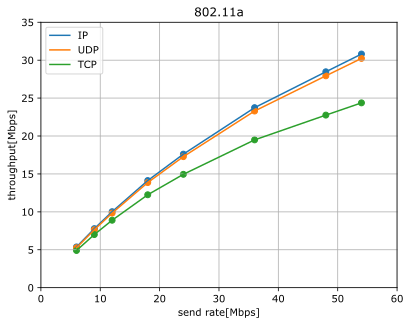

In [10]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ["svg"]


plt.plot(send_rate, throughput_a_ip, label="IP")
plt.scatter(send_rate, throughput_a_ip)
plt.plot(send_rate, throughput_a_udp, label="UDP")
plt.scatter(send_rate, throughput_a_udp)
plt.plot(send_rate, throughput_a_tcp, label="TCP")
plt.scatter(send_rate, throughput_a_tcp)

plt.xlabel("send rate[Mbps]")
plt.ylabel("throughput[Mbps]")
plt.xlim(0, 60)
plt.ylim(0, 35)

plt.title("802.11a")
plt.grid(True)
plt.legend()
plt.show()

# 802.11g

## TCP

In [11]:
throughput_g_tcp = [0] * 8

# 802.11g throughput of tcp
for i in range(8):
    throughput_g_tcp[i] = TCP_PAYLOAD / ((ack_len_data_flame[i] + len_data_flame[i
                                                                                ] + SIFS_g + BACKOFF_TIME_g + 6) * 2 + (ack_len_data_flame[i] + tcp_len_data_flame[i] + SIFS_g + BACKOFF_TIME_g + 6))

print(throughput_g_tcp)

[4.607495069033531, 6.414058209774849, 7.961826857532379, 10.55103884372177, 12.491978609625669, 15.51128818061089, 17.511244377811096, 18.45181674565561]


## UDP

In [12]:
throughput_g_udp = [0] * 8

# 802.11a throughput of udp
for i in range(8):
    throughput_g_udp[i] = UDP_PAYLOAD / (ack_len_data_flame[i] + len_data_flame[i] + SIFS_g + BACKOFF_TIME_g + 6)

print(throughput_g_udp)

[5.036783575705732, 7.154313487241798, 9.044546850998463, 12.343815513626835, 14.982188295165395, 19.304918032786887, 22.38783269961977, 23.838056680161944]


## IP

In [13]:
throughput_g_ip = [0] * 8

# 802.11a throughput of ip
for i in range(8):
    throughput_g_ip[i] = IP_PACKET / (ack_len_data_flame[i] + len_data_flame[i] + SIFS_g + BACKOFF_TIME_g + 6)

print(throughput_g_ip)

[5.132591958939265, 7.290400972053463, 9.216589861751151, 12.578616352201259, 15.267175572519085, 19.672131147540984, 22.813688212927758, 24.291497975708502]


## graph

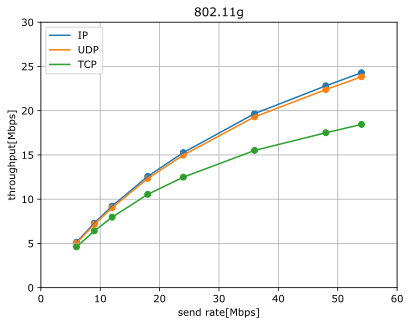

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ["svg"]


plt.plot(send_rate, throughput_g_ip, label="IP")
plt.scatter(send_rate, throughput_g_ip)
plt.plot(send_rate, throughput_g_udp, label="UDP")
plt.scatter(send_rate, throughput_g_udp)
plt.plot(send_rate, throughput_g_tcp, label="TCP")
plt.scatter(send_rate, throughput_g_tcp)

plt.xlabel("send rate[Mbps]")
plt.ylabel("throughput[Mbps]")
plt.xlim(0, 60)
plt.ylim(0, 30)

plt.title("802.11g")
plt.grid(True)
plt.legend()
plt.show()